In [1]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
dataset_df = pd.read_csv("/kaggle/input/credit-risk-analysis-for-extending-bank-loans/bankloans.csv")
dataset_df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [3]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1150 non-null   int64  
 1   ed        1150 non-null   int64  
 2   employ    1150 non-null   int64  
 3   address   1150 non-null   int64  
 4   income    1150 non-null   int64  
 5   debtinc   1150 non-null   float64
 6   creddebt  1150 non-null   float64
 7   othdebt   1150 non-null   float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 81.0 KB


## Drop null row

In [4]:
dataset_df.dropna(inplace=True)

In [5]:
dataset_df.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,34.860000,1.722857,8.388571,8.278571,45.601429,10.260571,1.553553,3.058209,0.261429
std,7.997342,0.928206,6.658039,6.824877,36.814226,6.827234,2.117197,3.287555,0.439727
min,20.000000,1.000000,0.000000,0.000000,14.000000,0.400000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.000000,0.369059,1.044178,0.000000
50%,34.000000,1.000000,7.000000,7.000000,34.000000,8.600000,0.854869,1.987567,0.000000
75%,40.000000,2.000000,12.000000,12.000000,55.000000,14.125000,1.901955,3.923065,1.000000
max,56.000000,5.000000,31.000000,34.000000,446.000000,41.300000,20.561310,27.033600,1.000000


In [6]:
dataset_df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


## Bar chart plot for label column: default

<Axes: >

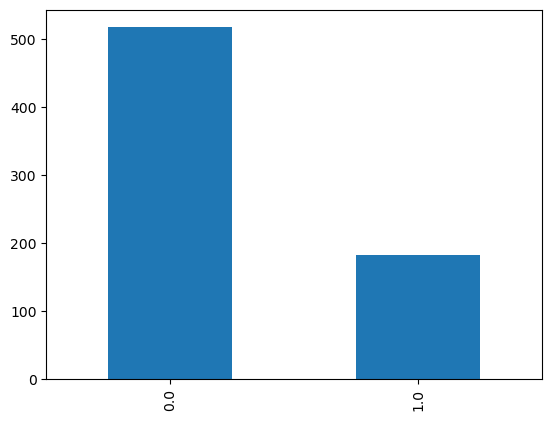

In [7]:
plot_df = dataset_df.default.value_counts()
plot_df.plot(kind="bar")

* Imbalance data => Random Forest

## Prepare data

Split dataset into training testing dataset

In [8]:
test_ls = np.random.rand(len(dataset_df)) < 0.2
train_df = dataset_df[~test_ls]
test_df = dataset_df[test_ls]
print(len(train_df), len(test_df))

548 152


Convert Pandas DataFrame into Tensorflow Dataset for Random Forest Model

In [9]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label="default")
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label="default")

Convert into (X, y) pair for ANN model

In [10]:
encoder = OneHotEncoder()
def process(df):
    return df.drop(columns=["default"]).values, encoder.fit_transform(df["default"].values.reshape(-1,1)).toarray()
X_train,y_train = process(train_df)
X_test, y_test = process(test_df)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(548, 8) (152, 8)
(548, 2) (152, 2)


# Random Forest Model

In [11]:
rf = tfdf.keras.RandomForestModel()
rf.compile(metrics=["accuracy"])

Use /tmp/tmpg6c4oigs as temporary training directory


## Train rf model

In [12]:
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:05.304508. Found 548 examples.
Training model...
Model trained in 0:00:00.300644
Compiling model...


[INFO 23-07-06 12:27:47.9669 UTC kernel.cc:1242] Loading model from path /tmp/tmpg6c4oigs/model/ with prefix ab23ae1f1f0d47c7
[INFO 23-07-06 12:27:48.0695 UTC decision_forest.cc:660] Model loaded with 300 root(s), 27816 node(s), and 8 input feature(s).
[INFO 23-07-06 12:27:48.0695 UTC abstract_model.cc:1311] Engine "RandomForestOptPred" built
[INFO 23-07-06 12:27:48.0695 UTC kernel.cc:1074] Use fast generic engine


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


## Visualize model

In [13]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)

## Evaluate

OOB dataset (Out of bag)

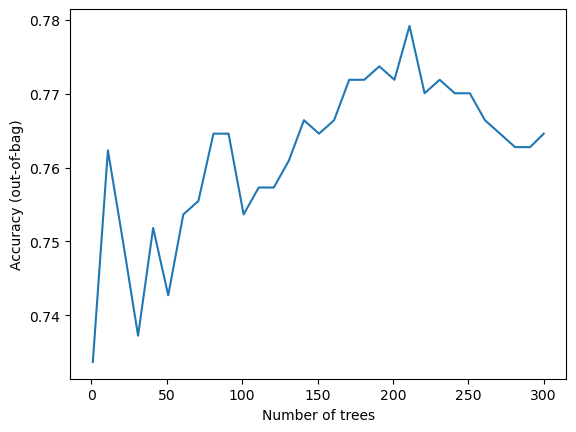

In [14]:
import matplotlib.pyplot as plt
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")
plt.show()

In [15]:
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=548, accuracy=0.7645985401459854, loss=0.5772951349129996, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

Test set

In [16]:
evaluation = rf.evaluate(x=test_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 418ms/step - loss: 0.0000e+00 - accuracy: 0.8092
loss: 0.0000
accuracy: 0.8092


# ANN model

In [17]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from keras.optimizers import Adam

In [18]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1],), name='Input'))
model.add(Dense(units=256, activation='relu', name='fc1'))
model.add(Dense(units=256, activation='relu', name='fc2'))
model.add(Dropout(0.2))
model.add(Dense(units=128, activation='relu', name='fc3'))
model.add(Dropout(0.2))
model.add(Dense(units=2, activation='softmax', name='Output_layer'))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 256)               2304      
                                                                 
 fc2 (Dense)                 (None, 256)               65792     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 fc3 (Dense)                 (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 Output_layer (Dense)        (None, 2)                 258       
                                                                 
Total params: 101,250
Trainable params: 101,250
Non-trai

In [19]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("/kaggle/working/model.pth", monitor='val_accuracy', verbose=0, save_best_only=True, mode='auto')
his = model.fit(x=X_train, y=y_train, batch_size=32, epochs=50, validation_split=0.1, callbacks = [checkpoint])

Epoch 1/50
16/16 [==============================] - 2s 102ms/step - loss: 1.0272 - accuracy: 0.6998 - val_loss: 0.6064 - val_accuracy: 0.7818
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 0.6608 - accuracy: 0.7262 - val_loss: 0.5236 - val_accuracy: 0.7818
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5459 - accuracy: 0.7363 - val_loss: 0.5496 - val_accuracy: 0.7636
Epoch 4/50
16/16 [==============================] - 1s 73ms/step - loss: 0.5345 - accuracy: 0.7363 - val_loss: 0.5307 - val_accuracy: 0.8000
Epoch 5/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5040 - accuracy: 0.7667 - val_loss: 0.4858 - val_accuracy: 0.7818
Epoch 6/50
16/16 [==============================] - 0s 5ms/step - loss: 0.4638 - accuracy: 0.7606 - val_loss: 0.4787 - val_accuracy: 0.8000
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 0.4943 - accuracy: 0.7566 - val_loss: 0.5300 - val_accuracy: 0.7455
Epoch 8/50
16/16 

## Eavaluate

Load best model

In [20]:
model = keras.models.load_model("/kaggle/working/model.pth")

In [21]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 1s 3ms/step - loss: 0.4231 - accuracy: 0.7961


[0.4231265187263489, 0.7960526347160339]